# Fashion-MNIST

This notebook shows how to use the function `pymde.preserve_neighbors` to produce embeddings that highlight the local structure of your data, using [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) as a case study. In these embeddings similar fashion articles from a class of 10 are near each other, and dissimilar articles are not near each other. Recall the class labels 0 till 9 correspond to:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

It also shows how to debug embeddings and search for outliers in your original data, using PyMDE.

In [1]:
import pymde

In [2]:
f_mnist = pymde.datasets.FashionMNIST()

Mar 25 09:55:37 AM: Loading cached dataset.


## Embeddings, in one line

Mar 25 09:55:38 AM: Computing 15-nearest neighbors, with max_distance=None
Thu Mar 25 09:55:48 2021 Building RP forest with 21 trees
Thu Mar 25 09:55:51 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Mar 25 09:56:05 AM: Computing quadratic initialization.
Mar 25 09:56:12 AM: Fitting a centered embedding into R^2, for a graph with 70000 items and 1701373 edges.
Mar 25 09:56:12 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Mar 25 09:56:12 AM: iteration 000 | distortion 0.318419 | residual norm 0.0167613 | step length 0.439609 | percent change 0.0019693
Mar 25 09:56:17 AM: iteration 030 | distortion 0.118401 | residual norm 0.000456463 | step length 1 | percent change 1.29905
Mar 25 09:56:21 AM: iteration 060 | distortion 0.106572 | residual norm 0.000163479 | step length 1 | percent change 0.389966
Mar 25 09:56:25 AM: iteration 090 | distortion 0.104749 | residual norm 8.78513e-05 | step 

<AxesSubplot:>

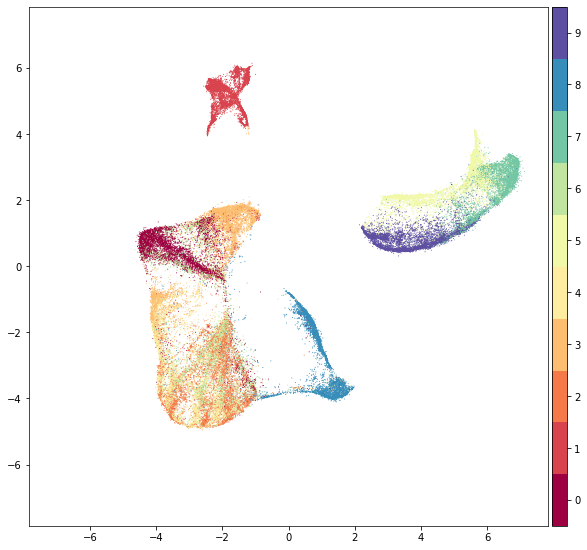

In [3]:
embedding = pymde.preserve_neighbors(f_mnist.data, verbose=True).embed(verbose=True)
pymde.plot(embedding, color_by=f_mnist.attributes['class'])

Mar 25 09:57:09 AM: Fitting a standardized embedding into R^2, for a graph with 70000 items and 1276142 edges.
Mar 25 09:57:09 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Mar 25 09:57:10 AM: iteration 000 | distortion 0.219600 | residual norm 0.0161771 | step length 0.575008 | percent change 0.00248606
Mar 25 09:57:13 AM: iteration 030 | distortion 0.134587 | residual norm 0.000340874 | step length 1 | percent change 0.181107
Mar 25 09:57:17 AM: iteration 060 | distortion 0.131324 | residual norm 0.000126077 | step length 1 | percent change 0.339375
Mar 25 09:57:21 AM: iteration 090 | distortion 0.130963 | residual norm 5.11233e-05 | step length 1 | percent change 0.248176
Mar 25 09:57:26 AM: iteration 120 | distortion 0.130791 | residual norm 4.7911e-05 | step length 1 | percent change 0.0330348
Mar 25 09:57:30 AM: iteration 150 | distortion 0.130688 | residual norm 4.20794e-05 | step length 1 | percent change 0.0243449
Mar 25 09:57:35 AM: iteration 180 | 

<AxesSubplot:>

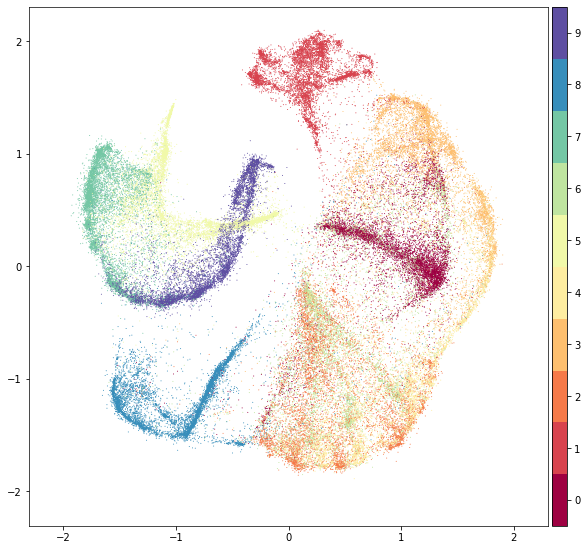

In [4]:
embedding = pymde.preserve_neighbors(f_mnist.data, constraint=pymde.Standardized()).embed(verbose=True)
pymde.plot(embedding, color_by=f_mnist.attributes['class'])

Mar 25 09:58:02 AM: Fitting a standardized embedding into R^2, for a graph with 70000 items and 850866 edges.
Mar 25 09:58:02 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Mar 25 09:58:02 AM: iteration 000 | distortion 0.011040 | residual norm 1.41117e-07 | step length 0 | percent change 0
Mar 25 09:58:02 AM: Converged in 001 iterations, with residual norm 1.41117e-07
Mar 25 09:58:02 AM: Finished fitting in 0.136 seconds and 1 iterations.
Mar 25 09:58:02 AM: average distortion 0.011 | residual norm 1.4e-07


<AxesSubplot:>

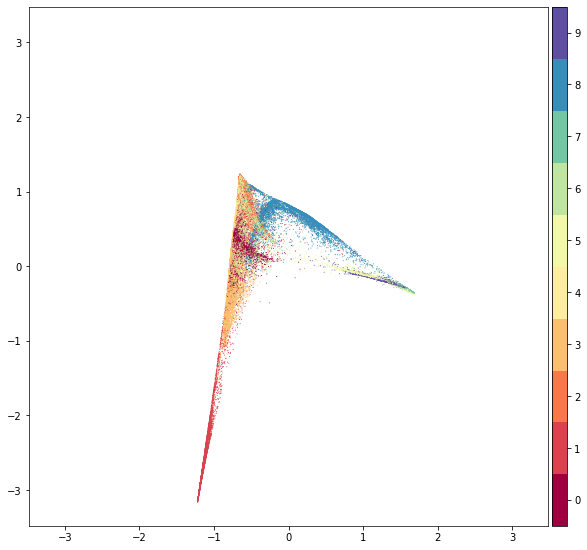

In [5]:
embedding = pymde.preserve_neighbors(f_mnist.data,
    attractive_penalty=pymde.penalties.Quadratic,
    repulsive_penalty=None,
).embed(verbose=True)
pymde.plot(embedding, color_by=f_mnist.attributes['class'])

## Embeddings, from scratch

In [6]:
knn_graph = pymde.preprocess.k_nearest_neighbors(f_mnist.data, k=15, verbose=True)

Thu Mar 25 09:58:03 2021 Building RP forest with 21 trees
Thu Mar 25 09:58:05 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations


### Quadratic MDE problems

The `embed` method computes and returns an embedding.

The embedding is also accessible via the `X` attribute of the `MDE` instance.

In [7]:
quadratic_mde = pymde.MDE(
    n_items=f_mnist.data.shape[0],
    embedding_dim=2,
    edges=knn_graph.edges,
    distortion_function=pymde.penalties.Quadratic(knn_graph.weights),
    constraint=pymde.Standardized())

quadratic_mde.embed(verbose=True)

Mar 25 09:58:08 AM: Fitting a standardized embedding into R^2, for a graph with 70000 items and 850836 edges.
Mar 25 09:58:08 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Mar 25 09:58:09 AM: iteration 000 | distortion 4.933086 | residual norm 0.0155527 | step length 5483.32 | percent change 22.7922
Mar 25 09:58:10 AM: iteration 030 | distortion 0.122332 | residual norm 0.00122256 | step length 1 | percent change 9.25231
Mar 25 09:58:11 AM: iteration 060 | distortion 0.030697 | residual norm 0.000589983 | step length 1 | percent change 9.17074
Mar 25 09:58:13 AM: iteration 090 | distortion 0.014907 | residual norm 0.000196382 | step length 1 | percent change 2.05356
Mar 25 09:58:14 AM: iteration 120 | distortion 0.012061 | residual norm 0.000176925 | step length 1 | percent change 1.22116
Mar 25 09:58:16 AM: iteration 150 | distortion 0.011220 | residual norm 5.00263e-05 | step length 1 | percent change 0.254563
Mar 25 09:58:17 AM: iteration 180 | distortion 

tensor([[-0.0992,  1.3693],
        [-0.2172, -0.8155],
        [ 0.4322, -0.5497],
        ...,
        [-0.1396, -0.5355],
        [ 2.6225, -0.4653],
        [-0.1286,  1.5133]])

After embedding, we can call the `plot` method to visualize the embedding (when `embedding_dim` $\leq 3$).

The `color_by` keyword argument takes a length-$n$ list of attribute values associated with the items; the values are used to color the points, with each unique value getting its own color. 

Here, the attribute is the fashion article depicted by the image.

<AxesSubplot:>

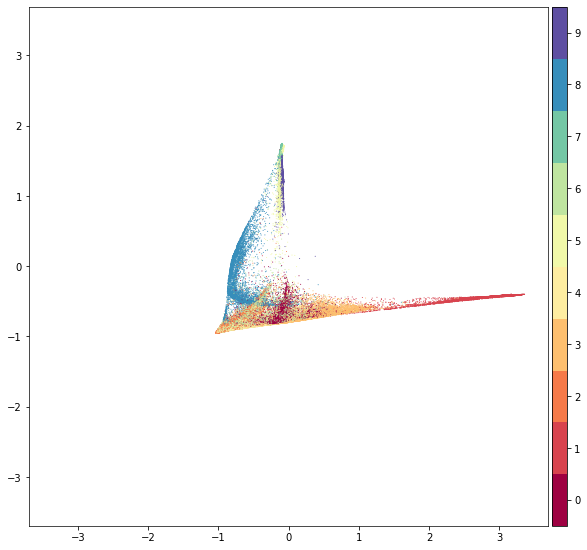

In [8]:
quadratic_mde.plot(color_by=f_mnist.attributes['class'])

Next, we fit an embedding with 3 dimensions. We can visualize 3D embeddings with `PyMDE`.

Mar 25 09:58:18 AM: Fitting a standardized embedding into R^3, for a graph with 70000 items and 850836 edges.
Mar 25 09:58:18 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Mar 25 09:58:19 AM: iteration 000 | distortion 7.403871 | residual norm 0.0191799 | step length 3033.9 | percent change 12.6981
Mar 25 09:58:21 AM: iteration 030 | distortion 0.213919 | residual norm 0.00138828 | step length 1 | percent change 7.17022
Mar 25 09:58:22 AM: iteration 060 | distortion 0.065709 | residual norm 0.000533347 | step length 1 | percent change 0.972142
Mar 25 09:58:24 AM: iteration 090 | distortion 0.037577 | residual norm 0.000346788 | step length 1 | percent change 2.19465
Mar 25 09:58:25 AM: iteration 120 | distortion 0.028903 | residual norm 0.000134701 | step length 1 | percent change 0.970214
Mar 25 09:58:27 AM: iteration 150 | distortion 0.027732 | residual norm 5.20118e-05 | step length 1 | percent change 0.443342
Mar 25 09:58:29 AM: iteration 180 | distortion

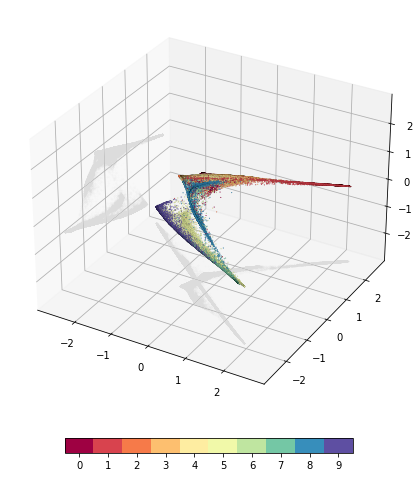

In [9]:
quadratic_mde_3d = pymde.MDE(
    n_items=f_mnist.data.shape[0],
    embedding_dim=3,
    edges=knn_graph.edges,
    distortion_function=pymde.penalties.Quadratic(knn_graph.weights),
    constraint=pymde.Standardized())

quadratic_mde_3d.embed(verbose=True)
quadratic_mde_3d.plot(color_by=f_mnist.attributes['class'])

## Debugging the embedding

### The distribution of distortions

We can visualize the cumulative distribution of distortions. We see that a small number of pairs are responsible for most of the embedding's distortion.

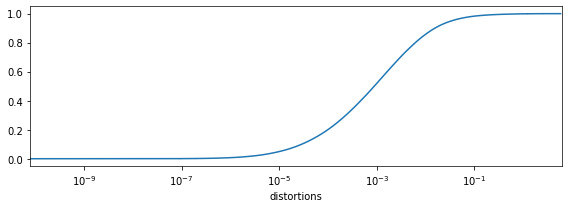

In [10]:
quadratic_mde.distortions_cdf()

### High distortion pairs

It can be instructive to inspect the pairs with highest distortion. A pair, here one column of the grid, is a set of two images that our MDE problem was told are similar. In this case, some of the high-distortion pairs are possiblity misclassified articles, and don't appear very similar to each other.

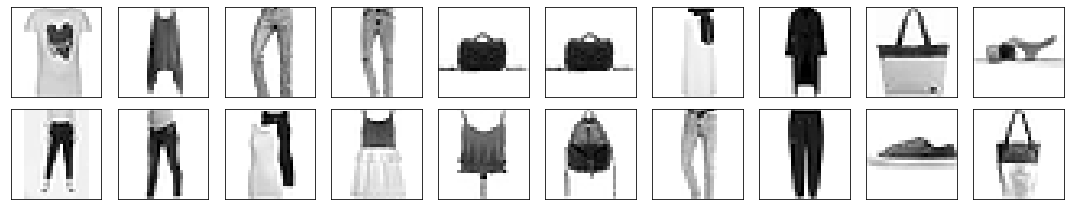

In [11]:
import matplotlib.pyplot as plt

pairs, distortions = quadratic_mde.high_distortion_pairs()
outliers = pairs[:10]

def plot_pairs(pairs):
    fig, axs = plt.subplots(2, pairs.shape[0], figsize=(15.0, 3.))
    for pair_index in range(pairs.shape[0]):
        i = pairs[pair_index][0]
        j = pairs[pair_index][1]
        im_i = f_mnist.data[i].reshape(28, 28)
        im_j = f_mnist.data[j].reshape(28, 28)
        axs[0][pair_index].imshow(im_i, cmap=plt.cm.get_cmap('gray').reversed())
        axs[0][pair_index].set_xticks([])
        axs[0][pair_index].set_yticks([])
        axs[1][pair_index].imshow(im_j, cmap=plt.cm.get_cmap('gray').reversed())
        axs[1][pair_index].set_xticks([])
        axs[1][pair_index].set_yticks([])
    plt.tight_layout()
    
plot_pairs(outliers)

## Low distortion pairs

In comparison, the pairs with the lowest distortion look like very reasonable pairs of images.

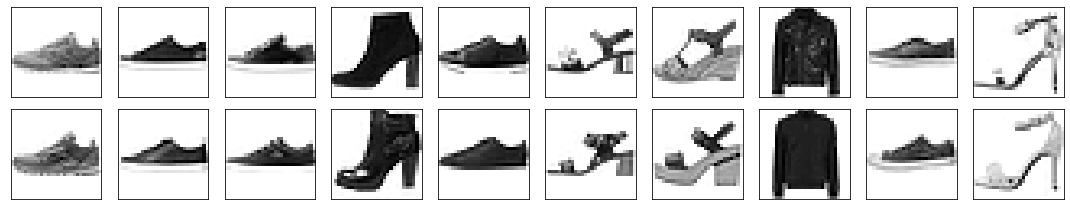

In [12]:
low_distortion_pairs = pairs[-10:]
plot_pairs(low_distortion_pairs)

## Including dissimilar pairs

The quadratic MDE problem used a standardization constraint to enforce the embedding to spread out, and only used pairs of similar items.

Instead of only relying on the constraint, we can also design the distortion functions so that they discourage dissimilar items from being close. We do this by including some pairs of dissimilar items, in addition to the pairs of similar items.

### Form $\mathcal{E} = \mathcal{E}_\text{sim} \cup \mathcal{E}_\text{dis}$

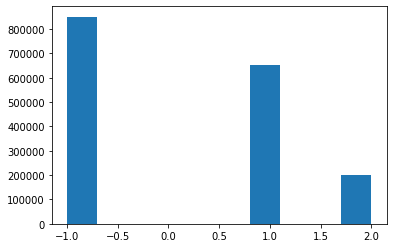

In [13]:
import matplotlib.pyplot as plt
import torch


similar_edges = knn_graph.edges

dissimilar_edges = pymde.preprocess.dissimilar_edges(
    n_items=f_mnist.data.shape[0], num_edges=similar_edges.shape[0], similar_edges=similar_edges)

edges = torch.cat([similar_edges, dissimilar_edges])
weights = torch.cat([knn_graph.weights, -1.*torch.ones(dissimilar_edges.shape[0])])

plt.hist(weights.numpy())
plt.show()

### Define the distortion function $f$

In [14]:
f = pymde.penalties.PushAndPull(
    weights=weights,
    attractive_penalty=pymde.penalties.Log1p,
    repulsive_penalty=pymde.penalties.Log,
)

### A standardized embedding ...

Mar 25 09:58:37 AM: Fitting a standardized embedding into R^2, for a graph with 70000 items and 1701398 edges.
Mar 25 09:58:37 AM: `embed` method parameters: eps=1.0e-05, max_iter=400, memory_size=10
Mar 25 09:58:38 AM: iteration 000 | distortion 0.311138 | residual norm 0.0151092 | step length 0.500437 | percent change 0.00202081
Mar 25 09:58:43 AM: iteration 040 | distortion 0.175737 | residual norm 0.000167847 | step length 1 | percent change 1.36139
Mar 25 09:58:49 AM: iteration 080 | distortion 0.173489 | residual norm 7.67585e-05 | step length 1 | percent change 0.214907
Mar 25 09:58:55 AM: iteration 120 | distortion 0.172762 | residual norm 8.60568e-05 | step length 1 | percent change 0.130568
Mar 25 09:59:01 AM: iteration 160 | distortion 0.172574 | residual norm 2.4197e-05 | step length 1 | percent change 0.170797
Mar 25 09:59:04 AM: Converged in 181 iterations, with residual norm 9.36716e-06
Mar 25 09:59:04 AM: Finished fitting in 26.603 seconds and 181 iterations.
Mar 25 09:

<AxesSubplot:>

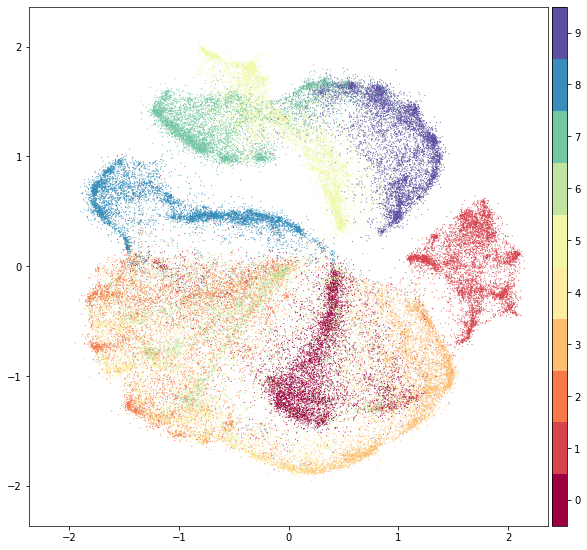

In [15]:
std_mde = pymde.MDE(
    n_items=f_mnist.data.shape[0],
    embedding_dim=2,
    edges=edges,
    distortion_function=f,
    constraint=pymde.Standardized(),
)
std_mde.embed(X=quadratic_mde.X, max_iter=400, verbose=True)
std_mde.plot(color_by=f_mnist.attributes['class'])

## ... and an unconstrained embedding

Mar 25 09:59:04 AM: Fitting a centered embedding into R^2, for a graph with 70000 items and 1701398 edges.
Mar 25 09:59:04 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Mar 25 09:59:05 AM: iteration 000 | distortion 0.311138 | residual norm 0.015121 | step length 0.500657 | percent change 0.00202328
Mar 25 09:59:10 AM: iteration 030 | distortion 0.117549 | residual norm 0.000428994 | step length 1 | percent change 1.51306
Mar 25 09:59:14 AM: iteration 060 | distortion 0.106105 | residual norm 0.000219405 | step length 1 | percent change 0.188385
Mar 25 09:59:19 AM: iteration 090 | distortion 0.104260 | residual norm 8.85546e-05 | step length 1 | percent change 0.110973
Mar 25 09:59:23 AM: iteration 120 | distortion 0.103421 | residual norm 7.49703e-05 | step length 1 | percent change 0.0616954
Mar 25 09:59:27 AM: iteration 150 | distortion 0.103099 | residual norm 4.74473e-05 | step length 1 | percent change 0.27356
Mar 25 09:59:32 AM: iteration 180 | distort

<AxesSubplot:>

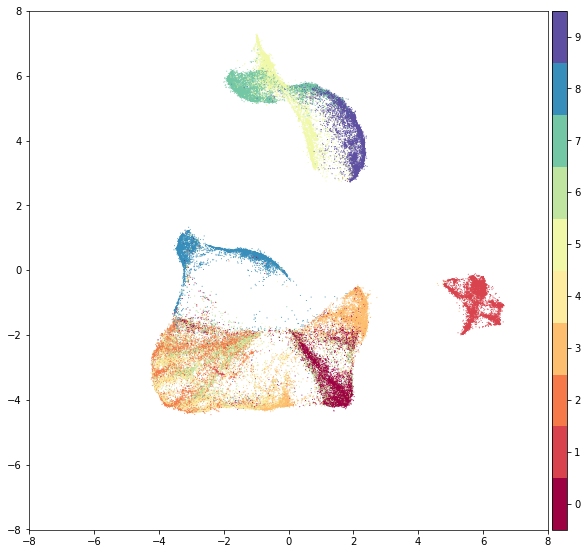

In [16]:
unconstrained_mde = pymde.MDE(
    n_items=f_mnist.data.shape[0],
    embedding_dim=2,
    edges=edges,
    distortion_function=f,
)
unconstrained_mde.embed(X=quadratic_mde.X, verbose=True)
unconstrained_mde.plot(color_by=f_mnist.attributes['class'])